In [1]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

In [2]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_institution USING (institution_niicode)
WHERE grantaward.startfiscalyear >= 2009
AND grantaward.category_niicode = 72
'''
df = pd.read_sql_query(sql, engine)

In [3]:
pivot = pd.crosstab([df['category_name'], df['section_name']], df['startfiscalyear'])
pivot

startfiscalyear              2014   2015   2016   2017   2018
category_name section_name                                   
基盤研究(C)       一般            10550  11321  11732  11983  12175
              特設分野             30     68     82     71      0

Text(0,0.5,'採択件数')

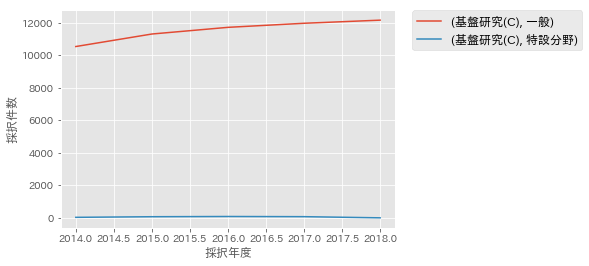

In [4]:
pivot = pivot.T
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.xlabel("採択年度")
plt.ylabel("採択件数")

In [5]:
df = df.query('section_niicode == 17')

In [17]:
teidaicode = [10101, 11301, 12601, 13901, 14301, 14401, 17102, 15301, 13101, 23903, 22701, 24402]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2014,2015,2016,2017,2018
institution_name,,,,,
東京大学,252,294,287,279,344
京都大学,232,279,288,252,288
大阪大学,235,261,258,272,282
東北大学,221,243,261,234,268
九州大学,226,249,214,223,236
北海道大学,198,154,188,189,196
名古屋大学,158,182,184,185,173
岡山大学,132,148,129,150,173
新潟大学,133,133,128,139,108


(0, 358.85)

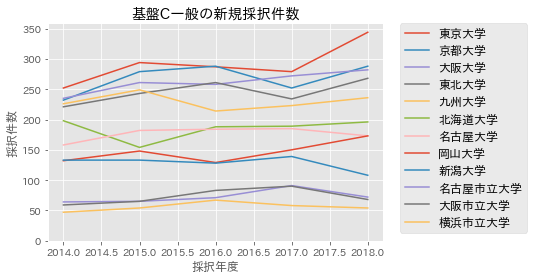

In [18]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('基盤C一般の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)